<a href="https://colab.research.google.com/github/endli215/EEC201_Final_Project/blob/main/EEC201_Final_Project_Team_Golf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Initialization**

In [ ]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import os
from scipy.signal import stft
from scipy import signal
import matplotlib.pyplot as plt
import scipy.sparse as sp
import librosa
import librosa.display
from scipy.fftpack import dct

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

!git clone https://github.com/endli215/EEC201_Final_Project.git
%cd EEC201_Final_Project

Cloning into 'EEC201_Final_Project'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 366 (delta 28), reused 1 (delta 1), pack-reused 326 (from 1)
Receiving objects: 100% (366/366), 15.26 MiB | 24.45 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/EEC201_Final_Project/EEC201_Final_Project/EEC201_Final_Project


### **Parameters**

In [ ]:
M = 100             # Step size
N = 256             # Window size
mel_banks = 20      # Number of Mel filters
n_mfcc = mel_banks  # Number of Mel Coefficients per window

## **Test 1**
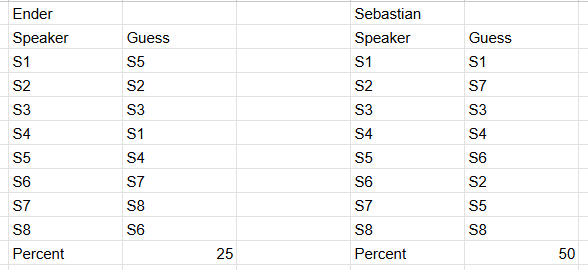


##**Test 2**

Duration of 256 samples for s2.wav: 0.020480 seconds
Duration of 256 samples for s11.wav: 0.005333 seconds
Duration of 256 samples for s9.wav: 0.005333 seconds
Duration of 256 samples for s6.wav: 0.020480 seconds
Duration of 256 samples for s3.wav: 0.020480 seconds
Duration of 256 samples for s5.wav: 0.020480 seconds
Duration of 256 samples for s1.wav: 0.020480 seconds
Duration of 256 samples for s13.wav: 0.005333 seconds
Duration of 256 samples for s4.wav: 0.020480 seconds
Duration of 256 samples for s12.wav: 0.005333 seconds
Duration of 256 samples for s7.wav: 0.020480 seconds
Duration of 256 samples for s10.wav: 0.005333 seconds
Duration of 256 samples for s8.wav: 0.005333 seconds


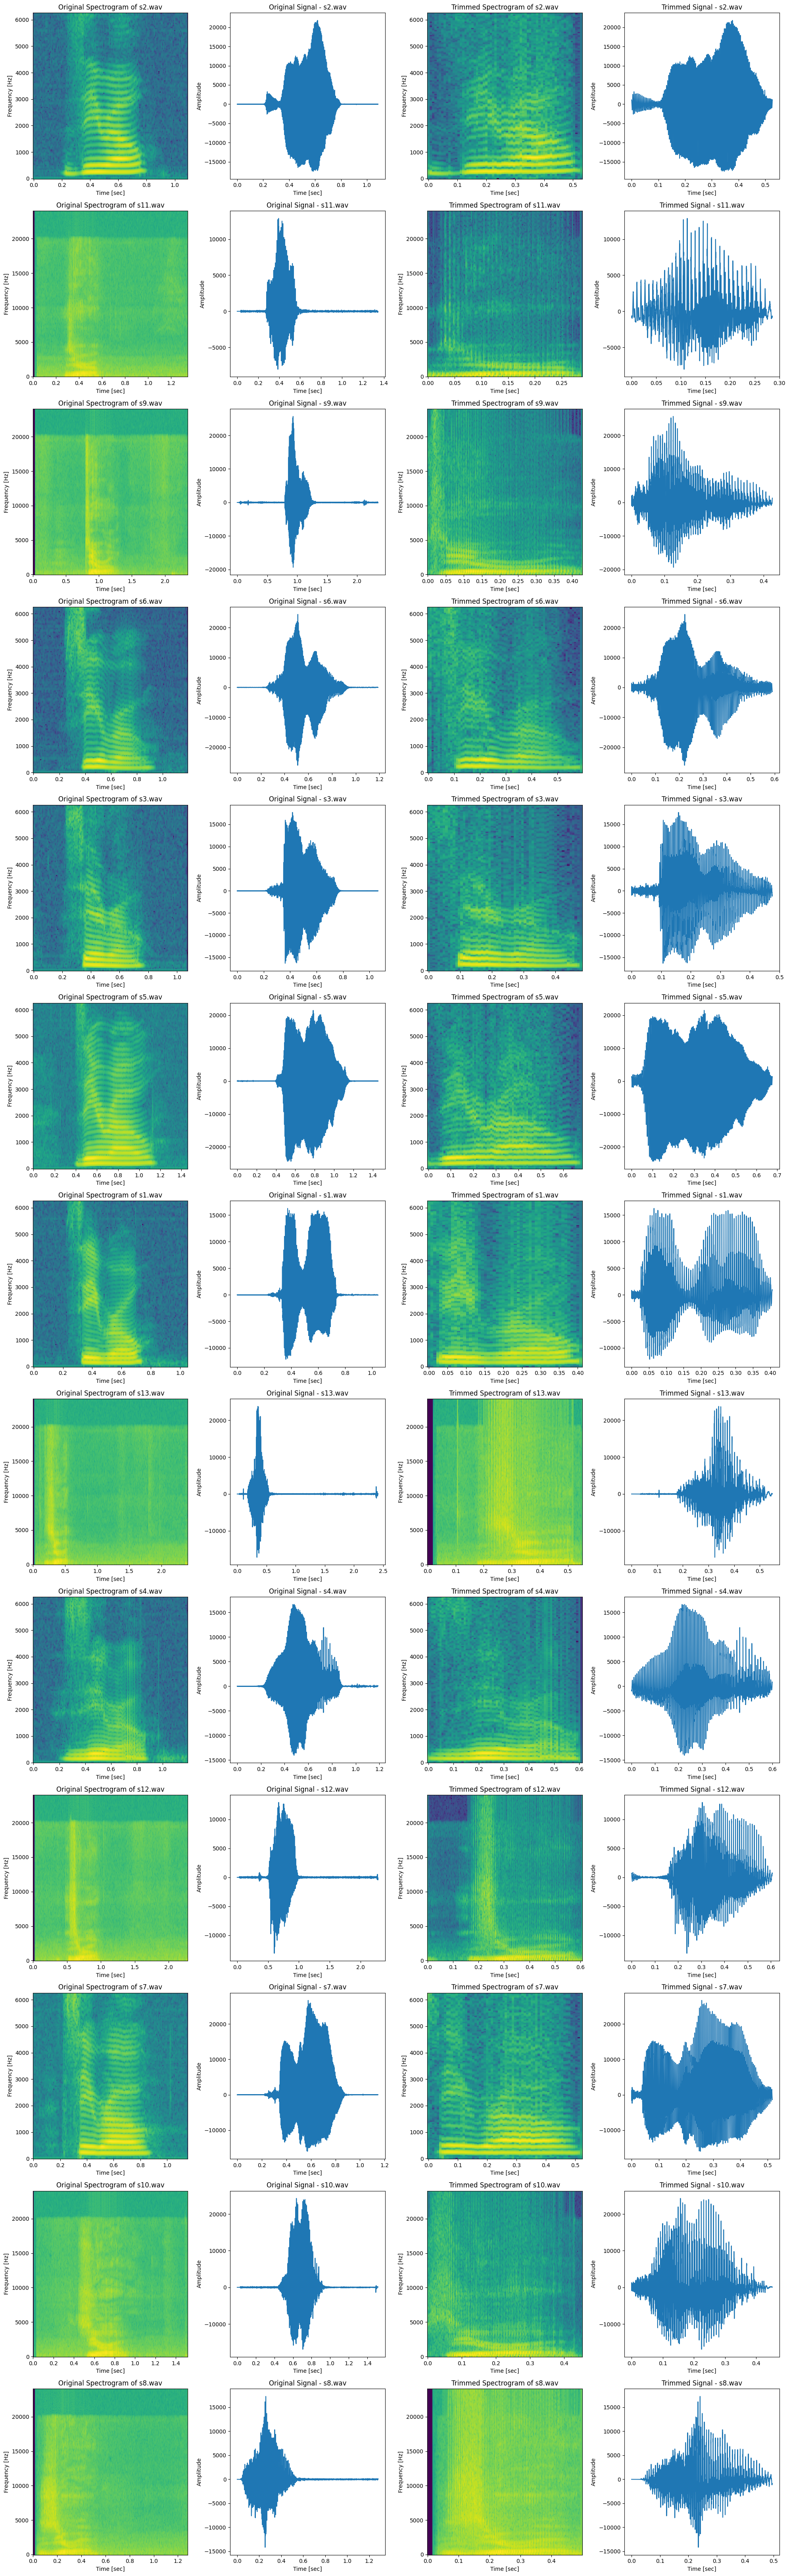

In [ ]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing audio files
test_data = '/content/EEC201_Final_Project/Training_Data_ext/'

# Define amplitude threshold (adjust as needed)
thresh_ratio = 0.05  # Example: 5% of max amplitude
min_duration = 0.2  # Minimum duration (in seconds) for a low-amplitude section to be removed

# Get all audio files
wav_files = [f for f in os.listdir(test_data) if f.endswith('.wav')]
num_files = len(wav_files)

# Create subplots
fig, axes = plt.subplots(num_files, 4, figsize=(20, 5 * num_files))

# Process multiple audio files
for idx, file_name in enumerate(wav_files):
    file_path = os.path.join(test_data, file_name)
    sample_rate, sig = scipy.io.wavfile.read(file_path)
    if len(np.shape(sig))>=2 :
        sig = sig[:,0]
    # Compute threshold dynamically per file
    thresh = np.max(np.abs(sig)) * thresh_ratio
    min_samples = int(min_duration * sample_rate)  # Convert to number of samples

    # Print duration of 256 samples in seconds
    duration_256 = 256 / sample_rate
    print(f"Duration of 256 samples for {file_name}: {duration_256:.6f} seconds")

    # Find indices where the amplitude is above the threshold
    threshold = np.abs(sig) > thresh

    # Identify contiguous low-amplitude regions
    sig_trimmed = []
    i = 0
    while i < len(sig):
        if not threshold[i]:
            start = i
            while i < len(sig) and not threshold[i]:
                i += 1
            if (i - start) >= min_samples:  # Only remove if duration exceeds min_samples
                continue  # Skip adding this section to sig_trimmed
            sig_trimmed.extend(sig[start:i])
        else:
            sig_trimmed.append(sig[i])
        i += 1

    sig_trimmed = np.array(sig_trimmed)

    # Compute STFT of original signal
    f_orig, t_orig, Sxx_orig = scipy.signal.stft(sig, fs=sample_rate, window=('kaiser', 8.0), nperseg=256, noverlap=156, nfft=512)
    axes[idx, 0].pcolormesh(t_orig, f_orig, 10 * np.log10(np.abs(Sxx_orig)+6e-12))  # Take magnitude before log10
    axes[idx, 0].set_ylabel('Frequency [Hz]')
    axes[idx, 0].set_xlabel('Time [sec]')
    axes[idx, 0].set_title(f"Original Spectrogram of {file_name}")

    # Plot original signal
    axes[idx, 1].plot(np.arange(len(sig)) / sample_rate, sig)
    axes[idx, 1].set_title(f"Original Signal - {file_name}")
    axes[idx, 1].set_xlabel("Time [sec]")
    axes[idx, 1].set_ylabel("Amplitude")

    # Compute STFT of trimmed signal (if available)
    if sig_trimmed.size > 0:
        f_trim, t_trim, Sxx_trim = scipy.signal.stft(sig_trimmed, fs=sample_rate, window=('kaiser', 8.0), nperseg=256, noverlap=156, nfft=512)
        axes[idx, 2].pcolormesh(t_trim, f_trim, 10 * np.log10(np.abs(Sxx_trim)+6e-12))  # Take magnitude before log10
        axes[idx, 2].set_ylabel('Frequency [Hz]')
        axes[idx, 2].set_xlabel('Time [sec]')
        axes[idx, 2].set_title(f"Trimmed Spectrogram of {file_name}")

        # Plot trimmed signal
        axes[idx, 3].plot(np.arange(len(sig_trimmed)) / sample_rate, sig_trimmed)
        axes[idx, 3].set_title(f"Trimmed Signal - {file_name}")
        axes[idx, 3].set_xlabel("Time [sec]")
        axes[idx, 3].set_ylabel("Amplitude")
    else:
        print(f"All signal segments were below the threshold and removed for {file_name}.")

plt.tight_layout()
plt.show()


##**Test 3**


###**Filter Banks**

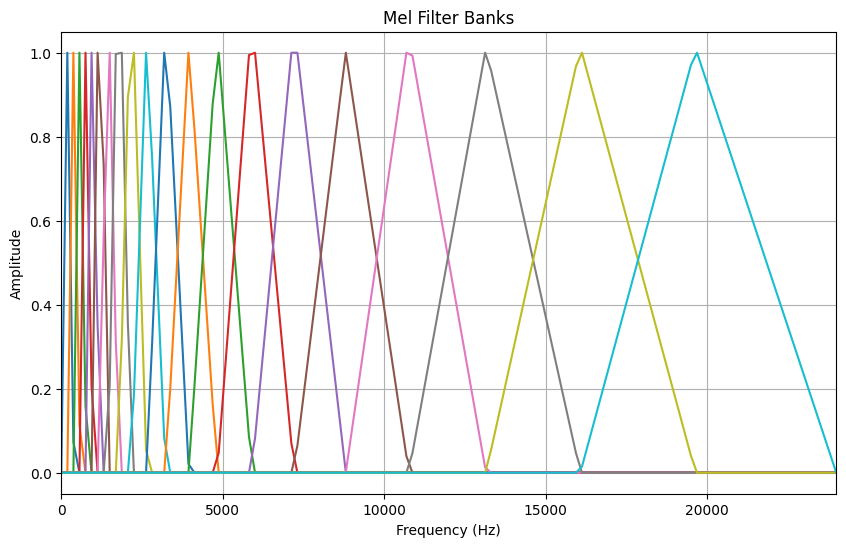

In [ ]:
#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Create Mel Frequency Banks
mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=mel_banks, fmin=0, fmax=sample_rate/2)
mel_filter_bank /= mel_filter_bank.max(axis=1, keepdims=True)

freqs = np.linspace(0, sample_rate / 2, N // 2 + 1)
plt.figure(figsize=(10, 6))
for i in range(mel_banks):
    plt.plot(freqs, mel_filter_bank[i], label=f'Mel {i+1}')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Mel Filter Banks")
plt.grid(True)
plt.xlim(0, sample_rate / 2)  # Limit x-axis to Nyquist frequency
plt.show()

###**Spectrum Before Applying Mel Filter Banks**

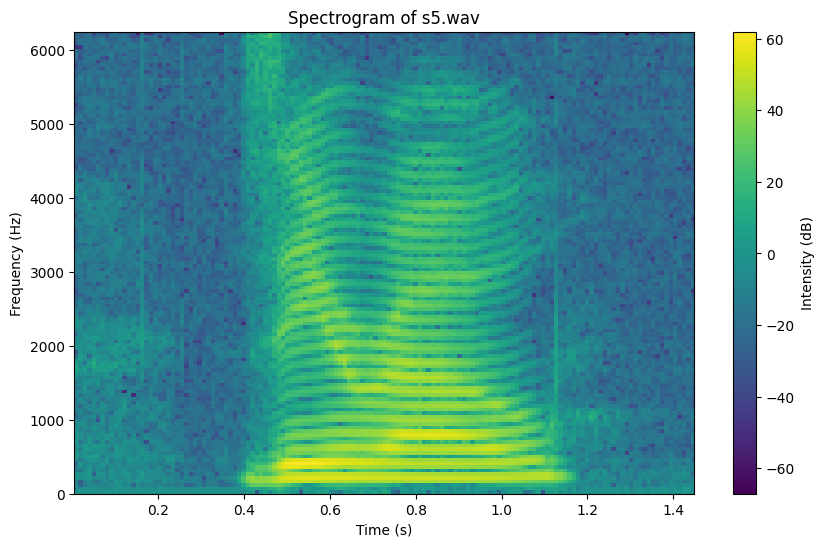

In [ ]:
# Define path to training data
training_data = 'Training_Data/'

# Load the audio file
sample_rate, sig = scipy.io.wavfile.read(training_data + 's5.wav')

# Plot spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(sig, Fs=sample_rate, cmap='viridis')

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of s5.wav")
plt.colorbar(label="Intensity (dB)")

plt.show()


###**Spectrum After Applying Mell Filter Banks**

Number of windows: 98
Length of each window: 256


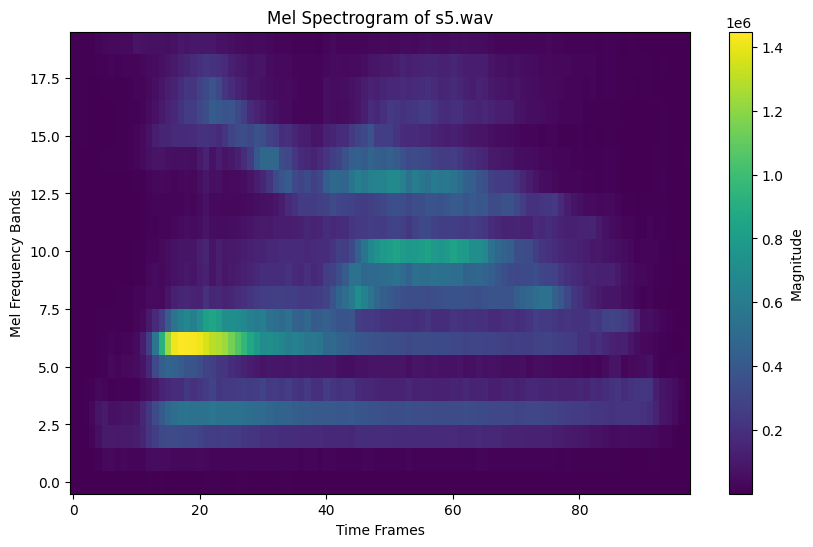

In [ ]:
training_data = 'Training_Data/'
# Get sample rate and sample values from signal
sample_rate, sig = scipy.io.wavfile.read(training_data + 's5.wav')  # File assumed to be in the same directory

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Signal Conditioning
threshold = 50
sig_filtered = sig[np.abs(sig) >= threshold]

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Frame Blocking
windows = []

for i in range(0, len(sig_filtered) - N + 1, M):
    window = sig_filtered[i:i + N]     # Extract a window of N samples
    windows.append(window)             # Store the window

print("Number of windows:", len(windows))
print("Length of each window:", len(windows[0]))

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Windowing
hamming_window = np.hamming(N)                               # Create Hamming window
windows = [window * hamming_window for window in windows]    # Apply Hamming window to each window

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ FFT (Keep Only Positive Frequencies)
fft_magnitudes = []
for window in windows:
    fft_result = np.fft.fft(window)                          # Compute FFT
    fft_magnitude = np.abs(fft_result[:N // 2 + 1])          # Keep only positive frequencies
    fft_magnitudes.append(fft_magnitude)

fft_magnitudes = np.array(fft_magnitudes)                   # Convert to a NumPy array for easier manipulation

# Print the shape of the FFT magnitudes array

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Apply Mel filter bank to the magnitude spectrogram
mel_spectrogram = np.dot(fft_magnitudes, mel_filter_bank.T)

# Plot the Mel Spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(mel_spectrogram.T, aspect='auto', origin='lower', cmap='viridis')

# Labels and title
plt.xlabel("Time Frames")
plt.ylabel("Mel Frequency Bands")
plt.title("Mel Spectrogram of s5.wav")
plt.colorbar(label="Magnitude")

plt.show()

###**Plot of Mel Cepstrum**

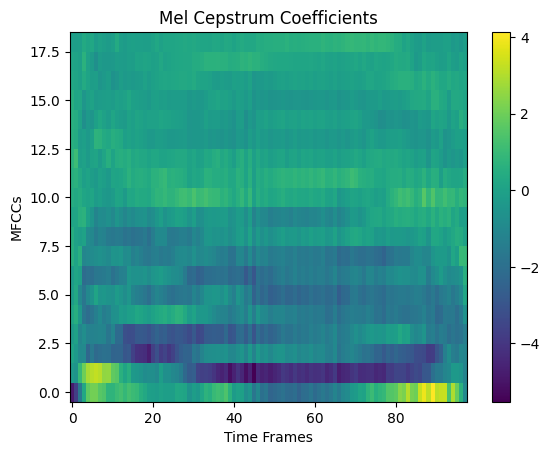

In [ ]:
#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Compute Mel Cepstrum Coefficients
log_mel_spectrogram = np.log(mel_spectrogram + 1e-10)  # Avoid log(0) by adding a small value
mfcc = dct(log_mel_spectrogram, axis=1, type=2, norm='ortho')[:, 1:n_mfcc]  # Keep coefficients 2-20

# Plot heatmap
plt.imshow(mfcc.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()  # Add color scale
plt.title("Mel Cepstrum Coefficients")
plt.xlabel("Time Frames")
plt.ylabel("MFCCs")
plt.show()


##**Test 4**

In [ ]:
import numpy as np
import scipy.io.wavfile
import librosa
from scipy.fftpack import dct

def cep_coefficients(file_number, Step_size, Window_size, Mel_banks, Training_Data):
    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Load File
    if Training_Data == 1:
      training_data = 'Training_Data/'  # Path to audio files
      file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
      sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    else:
        test_data = 'Test_Data/'  # Path to audio files
        file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
        sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Signal Conditioning
    threshold = 50
    sig_filtered = sig[np.abs(sig) >= threshold]  # Apply threshold for signal conditioning

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Parameters
    M = Step_size               # Step size
    N = Window_size             # Window size
    mel_banks = Mel_banks       # Number of Mel filters
    n_mfcc = mel_banks          # Number of Mel Coefficients per window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Frame Blocking
    windows = []
    for i in range(0, len(sig_filtered) - N + 1, M):
        window = sig_filtered[i:i + N]  # Extract a window of N samples
        windows.append(window)          # Store the window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Windowing
    hamming_window = np.hamming(N)  # Create Hamming window
    windows = [window * hamming_window for window in windows]  # Apply Hamming window to each window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ FFT (Keep Only Positive Frequencies)
    fft_magnitudes = []
    for window in windows:
        fft_result = np.fft.fft(window)  # Compute FFT
        fft_magnitude = np.abs(fft_result[:N // 2 + 1])  # Keep only positive frequencies
        fft_magnitudes.append(fft_magnitude)

    fft_magnitudes = np.array(fft_magnitudes)  # Convert to a NumPy array for easier manipulation

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Create Mel Frequency Banks
    mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=mel_banks, fmin=0, fmax=sample_rate / 2)
    mel_filter_bank /= mel_filter_bank.max(axis=1, keepdims=True)  # Normalize filter bank

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Apply Mel filter bank to the magnitude spectrogram
    mel_spectrogram = np.dot(fft_magnitudes, mel_filter_bank.T)  # Apply Mel filter bank to the FFT magnitudes

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Compute Mel Cepstrum Coefficients
    log_mel_spectrogram = np.log(mel_spectrogram + 1e-10)  # Avoid log(0) by adding a small value
    mfcc = dct(log_mel_spectrogram, axis=1, type=2, norm='ortho')[:, 1:n_mfcc]  # Keep coefficients 2-20

    return mfcc

# Example usage mfcc of the signal
cepstrum1  = cep_coefficients(1, 100, 256, 20,1)
print("MFCC Shape:", cepstrum1.shape)
cepstrum2 = cep_coefficients(2, 100, 256, 20,1)
print("MFCC Shape:", cepstrum2.shape)
cepstrum3 = cep_coefficients(3, 100, 256, 20,1)
print("MFCC Shape:", cepstrum3.shape)
cepstrum4 = cep_coefficients(4, 100, 256, 20,1)
print("MFCC Shape:", cepstrum4.shape)

MFCC Shape: (66, 19)
MFCC Shape: (72, 19)
MFCC Shape: (65, 19)
MFCC Shape: (100, 19)


##**Test 5**


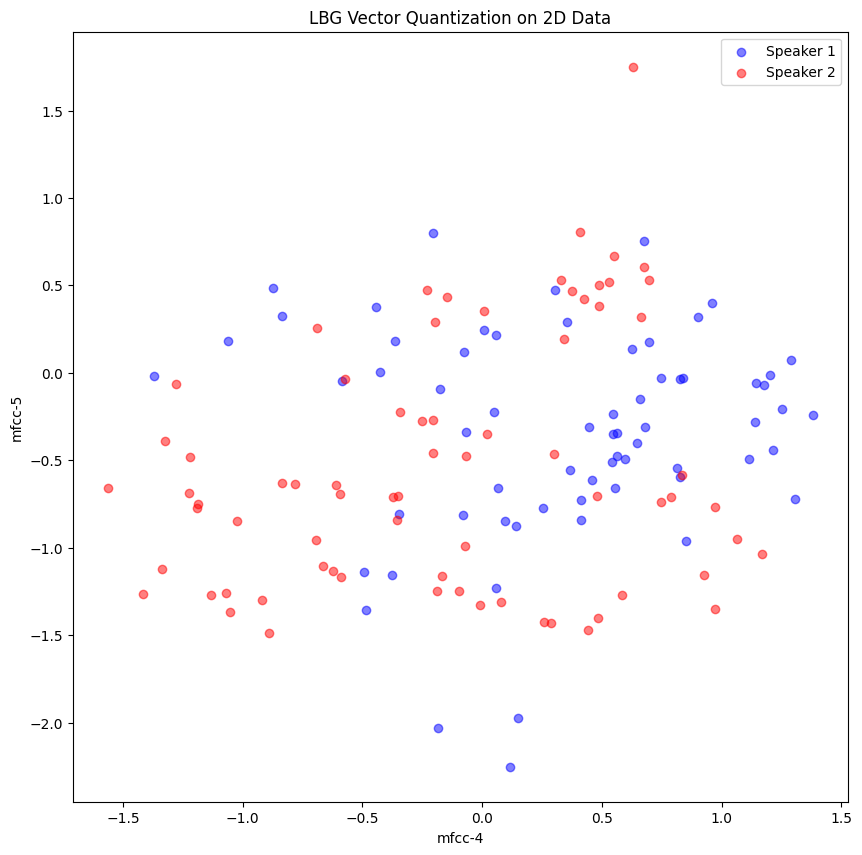

(66, 19)
(72, 19)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D synthetic data
# np.random.seed(42)
# data1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
# data2 = np.random.normal(loc=[6, 6], scale=0.5, size=(100, 2))
# data3 = np.random.normal(loc=[2, 6], scale=0.5, size=(100, 2))
# data4 = np.random.normal(loc=[6, 2], scale=0.5, size=(100, 2))
# data = np.vstack([data1, data2, data3, data4])

# Define the LBG function
def lbg_vector_quantization(data, num_centroids, epsilon):
    codebook = np.mean(data, axis=0, keepdims=True)

    while codebook.shape[0] < num_centroids:
        codebook = np.vstack([codebook - epsilon, codebook + epsilon])

        prev_distortion = np.inf
        while True:
            distances = np.linalg.norm(data[:, None, :] - codebook[None, :, :], axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else codebook[i]
                                      for i in range(codebook.shape[0])])

            distortion = np.sum((data - new_centroids[labels])**2)

            if np.abs(prev_distortion - distortion) < epsilon:
                break
            prev_distortion = distortion
            codebook = new_centroids

    return codebook, labels

# Run LBG algorithm
num_centroids = 4
centroids1, labels1 = lbg_vector_quantization(cepstrum1, num_centroids,0.5)
centroids2, labels2 = lbg_vector_quantization(cepstrum2, num_centroids,0.5)
# Plot results
plt.figure(figsize=(10, 10))
plt.scatter(cepstrum1[:, 4], cepstrum1[:, 5], c='blue', alpha=0.5, label='Speaker 1')

plt.scatter(cepstrum2[:, 4], cepstrum2[:, 5], c='red', alpha=0.5, label='Speaker 2')

plt.xlabel('mfcc-4')
plt.ylabel('mfcc-5')
plt.title('LBG Vector Quantization on 2D Data')
plt.legend()
plt.show()
print(cepstrum1.shape)
print(cepstrum2.shape)


## **Test 6**

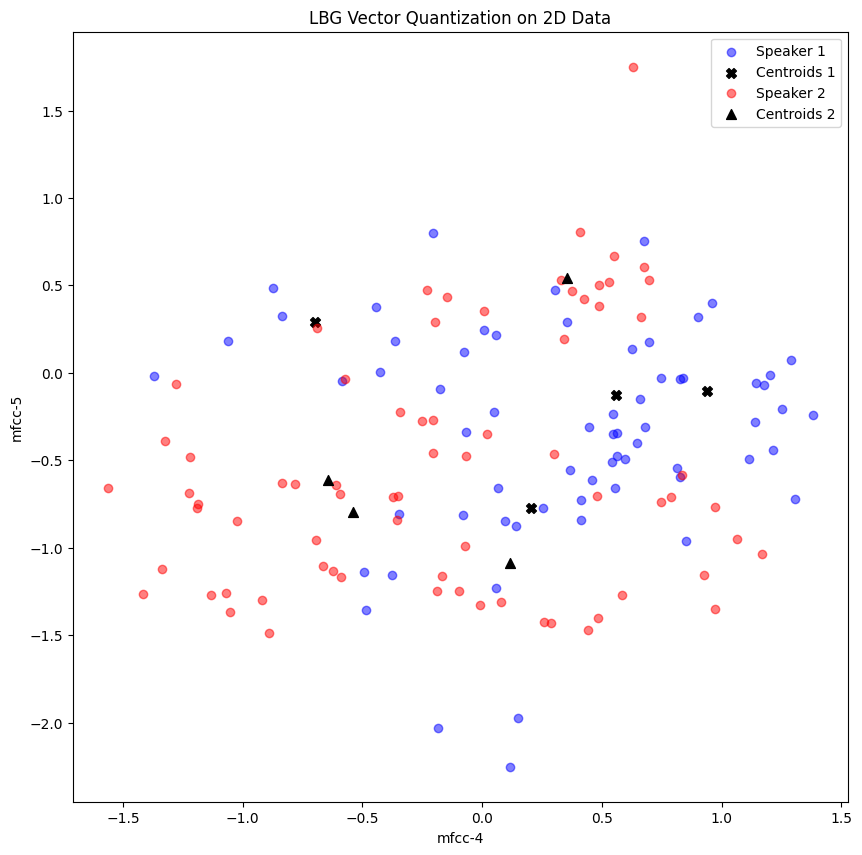

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(cepstrum1[:, 4], cepstrum1[:, 5], c='blue', alpha=0.5, label='Speaker 1')
plt.scatter(centroids1[:, 4], centroids1[:, 5], c='black', marker='X', s=50, label='Centroids 1')

plt.scatter(cepstrum2[:, 4], cepstrum2[:, 5], c='red', alpha=0.5, label='Speaker 2')
plt.scatter(centroids2[:, 4], centroids2[:, 5], c='black', marker='^', s=50, label='Centroids 2')

plt.xlabel('mfcc-4')
plt.ylabel('mfcc-5')
plt.title('LBG Vector Quantization on 2D Data')
plt.legend()
plt.show()


##**Test 7**

###**Compute Training Codebook**

In [ ]:
#//////////////////////////////////////////////////// Initial Parameters
M = 100             # Step size
N = 256             # Window size
mel_banks = 20      # Number of Mel filters
num_centroids = 8
#//////////////////////////////////////////////////// Create a dictionary to store codebooks
codebooks = {}
testbooks = {}

#//////////////////////////////////////////////////// Function to compute codebooks for a given file
def compute_codebooks(file_number, Step_size, Window_size, Mel_banks, num_centroids,Training_data,esp):
    """
    Computes the codebook for the given file using LBG vector quantization.

    Parameters:
    - file_number: int, identifier for the audio file
    - Step_size: int, step size for framing
    - Window_size: int, window size for framing
    - Mel_banks: int, number of mel filters (same as MFCC coefficients)
    - num_centroids: int, number of clusters (codebook size)

    Returns:
    - centroids: numpy array of shape (num_centroids, Mel_banks - 1), the final quantized codewords.
    """
    # Compute MFCC coefficients
    cepstrum = cep_coefficients(file_number, Step_size, Window_size, Mel_banks, Training_data)

    # Apply LBG vector quantization (Assuming lbg_vector_quantization is implemented)
    centroids, labels = lbg_vector_quantization(cepstrum, num_centroids,esp)

    return centroids  # Return the codebook (centroids)

# Compute codebooks for all 11 training files
for i in range(11):
    codebooks[i+1] = compute_codebooks(i+1, M, N, mel_banks, num_centroids,1,0.1)
for i in range(7):
    testbooks[i+1] = compute_codebooks(i+1, M, N, mel_banks, num_centroids,0,0.1)

# Print the generated codebooks
print(codebooks[1].shape)
print(codebooks[2].shape)
print(codebooks[3].shape)
print(codebooks[4].shape)
print(codebooks[5].shape)
print(codebooks[6].shape)
print(codebooks[7].shape)
print(codebooks[8].shape)
print(codebooks[9].shape)
print(codebooks[10].shape)
print(codebooks[11].shape)





(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)


###**Find Test Codebook closest match**

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
min_distance = 100
test_num = 0
correct = 0
def compare_codebooks(Codebook, Testbook, metric='euclidean'):

    # Compute the pairwise distance matrix
    distance_matrix = cdist(Codebook, Testbook, metric=metric)

    # Mean distance between all centroids
    #mean_distance = np.mean(distance_matrix)

    # Find the closest centroid distance for each centroid in codebook1
    closest_distances = np.min(distance_matrix, axis=1)

    # Mean distance between all centroids
    mean_distance = np.mean(closest_distances)
    return distance_matrix, mean_distance, closest_distances


for n in range(len(testbooks)):
  for i in range(len(codebooks)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks[i+1], testbooks[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy is", correct/len(testbooks))




The guess is 5
The guess is 2
The guess is 3
The guess is 4
The guess is 5
The guess is 6
The guess is 5
Total correct count is 5
The accuracy is 0.7142857142857143


##**Test 8**

###**Compute MFCC coefficients from Notch Filtered input signal**

In [ ]:
from scipy.signal import iirnotch, filtfilt
import numpy as np

def cep_coefficients_notch(file_number, Step_size, Window_size, Mel_banks, Training_Data, Notch_frequency):
    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Load File
    if Training_Data == 1:
      training_data = 'Training_Data/'  # Path to audio files
      file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
      sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    else:
        test_data = 'Test_Data/'  # Path to audio files
        file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
        sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Signal Conditioning
    threshold = 50
    sig_filtered = sig[np.abs(sig) >= threshold]  # Apply threshold for signal conditioning

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Create Notch filter
    b,a = iirnotch(Notch_frequency, 100, sample_rate)

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Apply Notch filter
    sig_filtered = filtfilt(b, a, sig_filtered)

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Parameters
    M = Step_size               # Step size
    N = Window_size             # Window size
    mel_banks = Mel_banks       # Number of Mel filters
    n_mfcc = mel_banks          # Number of Mel Coefficients per window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Frame Blocking
    windows = []
    for i in range(0, len(sig_filtered) - N + 1, M):
        window = sig_filtered[i:i + N]  # Extract a window of N samples
        windows.append(window)          # Store the window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Windowing
    hamming_window = np.hamming(N)  # Create Hamming window
    windows = [window * hamming_window for window in windows]  # Apply Hamming window to each window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ FFT (Keep Only Positive Frequencies)
    fft_magnitudes = []
    for window in windows:
        fft_result = np.fft.fft(window)  # Compute FFT
        fft_magnitude = np.abs(fft_result[:N // 2 + 1])  # Keep only positive frequencies
        fft_magnitudes.append(fft_magnitude)

    fft_magnitudes = np.array(fft_magnitudes)  # Convert to a NumPy array for easier manipulation

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Create Mel Frequency Banks
    mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=mel_banks, fmin=0, fmax=sample_rate / 2)
    mel_filter_bank /= mel_filter_bank.max(axis=1, keepdims=True)  # Normalize filter bank

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Apply Mel filter bank to the magnitude spectrogram
    mel_spectrogram = np.dot(fft_magnitudes, mel_filter_bank.T)  # Apply Mel filter bank to the FFT magnitudes

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Compute Mel Cepstrum Coefficients
    log_mel_spectrogram = np.log(mel_spectrogram + 1e-10)  # Avoid log(0) by adding a small value
    mfcc = dct(log_mel_spectrogram, axis=1, type=2, norm='ortho')[:, 1:n_mfcc]  # Keep coefficients 2-20

    return mfcc

###**Compute Codebooks for Notched Filtered input**

In [ ]:
def compute_codebooks_notch(file_number, Step_size, Window_size, Mel_banks, num_centroids,Training_data, Notch_frequency,epsilon):
    """
    Computes the codebook for the given file using LBG vector quantization.

    Parameters:
    - file_number: int, identifier for the audio file
    - Step_size: int, step size for framing
    - Window_size: int, window size for framing
    - Mel_banks: int, number of mel filters (same as MFCC coefficients)
    - num_centroids: int, number of clusters (codebook size)

    Returns:
    - centroids: numpy array of shape (num_centroids, Mel_banks - 1), the final quantized codewords.
    """
    # Compute MFCC coefficients
    cepstrum = cep_coefficients_notch(file_number, Step_size, Window_size, Mel_banks, Training_data, Notch_frequency)

    # Apply LBG vector quantization (Assuming lbg_vector_quantization is implemented)
    centroids, labels = lbg_vector_quantization(cepstrum, num_centroids,epsilon)

    return centroids  # Return the codebook (centroids)

    # Compute codebooks for all 12 training files
for i in range(11):
    codebooks[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 30,.1)
for i in range(7):
    testbooks[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,30,.1)

###**Find Closest Match**

In [ ]:
min_distance = 100
test_num = 0
correct = 0
def compare_codebooks(Codebook, Testbook, metric='euclidean'):

    # Compute the pairwise distance matrix
    distance_matrix = cdist(Codebook, Testbook, metric=metric)

    # Mean distance between all centroids
    #mean_distance = np.mean(distance_matrix)

    # Find the closest centroid distance for each centroid in codebook1
    closest_distances = np.min(distance_matrix, axis=1)

    # Mean distance between all centroids
    mean_distance = np.mean(closest_distances)
    return distance_matrix, mean_distance, closest_distances

print("Guessing Train and test data:")
for n in range(len(testbooks)):
  for i in range(len(codebooks)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks[i+1], testbooks[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy is", correct/len(testbooks))


Guessing Train and test data:
The guess is 4
The guess is 2
The guess is 7
The guess is 4
The guess is 5
The guess is 6
The guess is 5
Total correct count is 4
The accuracy is 0.5714285714285714


In [ ]:
# compute notch at 50Hz
codebooks50 = {}
testbooks50 = {}
for i in range(11):
    codebooks50[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 50,.1)
for i in range(7):
    testbooks50[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,50,.1)
test_num = 0
correct = 0
for n in range(len(testbooks50)):
  for i in range(len(codebooks50)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks50[i+1], testbooks50[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  #print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy for nothc @50Hz is", correct/len(testbooks50))

# compute notch at 200Hz
codebooks200 = {}
testbooks200 = {}
for i in range(11):
    codebooks200[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 200,.1)
for i in range(7):
    testbooks200[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,200,.1)
test_num = 0
correct = 0
for n in range(len(testbooks200)):
  for i in range(len(codebooks200)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks200[i+1], testbooks200[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  #print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy for nothc @200Hz is", correct/len(testbooks200))


# compute notch at 500Hz
codebooks500 = {}
testbooks500 = {}
for i in range(11):
    codebooks500[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 500,.1)
for i in range(7):
    testbooks500[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,500,.1)
test_num = 0
correct = 0
for n in range(len(testbooks500)):
  for i in range(len(codebooks500)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks500[i+1], testbooks500[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  #print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy for nothc @500Hz is", correct/len(testbooks500))

# compute notch at 1000Hz
codebooks1000 = {}
testbooks1000 = {}
for i in range(11):
    codebooks1000[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 1000,.1)
for i in range(7):
    testbooks1000[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,1000,.1)
test_num = 0
correct = 0
for n in range(len(testbooks1000)):
  for i in range(len(codebooks1000)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks1000[i+1], testbooks1000[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  #print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy for nothc @100Hz is", correct/len(testbooks1000))

# compute notch at 5000Hz
codebooks5000 = {}
testbooks5000 = {}
for i in range(11):
    codebooks5000[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,1, 5000,.1)
for i in range(7):
    testbooks5000[i+1] = compute_codebooks_notch(i+1, M, N, mel_banks, num_centroids,0,5000,.1)
test_num = 0
correct = 0
for n in range(len(testbooks5000)):
  for i in range(len(codebooks5000)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks5000[i+1], testbooks5000[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  #print("The guess is", test_num)
  if test_num == (n+1):
    correct += 1
  test_num = 0
  min_distance = 1000
print("Total correct count is", correct)
print("The accuracy for nothc @5000Hz is", correct/len(testbooks))

Total correct count is 4
The accuracy for nothc @50Hz is 0.5714285714285714
Total correct count is 4
The accuracy for nothc @200Hz is 0.5714285714285714
Total correct count is 4
The accuracy for nothc @500Hz is 0.5714285714285714
Total correct count is 5
The accuracy for nothc @100Hz is 0.7142857142857143
Total correct count is 4
The accuracy for nothc @5000Hz is 0.5714285714285714


##**Test 9**

###**Updated formula to take ceptrum from all possible file**

In [ ]:
import numpy as np
import scipy.io.wavfile
import librosa
from scipy.fftpack import dct
#/////////////Test_number is what number is being extra-----special=> 100 for extended training and testing
def cep_coefficients_new(file_number, Step_size, Window_size, Mel_banks, Training_Data , Test_number):
    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Load File
    if Test_number == 11:
      if Training_Data == 1:
        training_data = 'Eleven_Training/'  # Path to audio files
        file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
        sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

      else:
          test_data = 'Eleven_Test/'  # Path to audio files
          file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file
    if Test_number == 5:
        if Training_Data == 1:
          training_data = 'Five_Training/'  # Path to audio files
          file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

        else:
          test_data = 'Five_Test/'  # Path to audio files
          file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file
    if Test_number == 0:
        if Training_Data == 1:
          training_data = 'Zero_Training/'  # Path to audio files
          file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

        else:
          test_data = 'Zero_Testing/'  # Path to audio files
          file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    if Test_number == 12:
        if Training_Data == 1:
          training_data = 'Twelve_Training/'  # Path to audio files
          file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file
        else:
          test_data = 'Twelve_Testing/'  # Path to audio files
          file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file
    if Test_number == 100:
        if Training_Data == 1:
          training_data = 'Training_Data_ext/'  # Path to audio files
          file_path = f'{training_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

        else:
          test_data = 'Test_Data_ext/'  # Path to audio files
          file_path = f'{test_data}s{file_number}.wav'  # Correct way to insert variable into string
          sample_rate, sig = scipy.io.wavfile.read(file_path)  # Read the audio file

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Signal Conditioning
    threshold = 50
    sig_filtered = sig[np.abs(sig) >= threshold]  # Apply threshold for signal conditioning

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Parameters
    M = Step_size               # Step size
    N = Window_size             # Window size
    mel_banks = Mel_banks       # Number of Mel filters
    n_mfcc = mel_banks          # Number of Mel Coefficients per window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Frame Blocking
    windows = []
    for i in range(0, len(sig_filtered) - N + 1, M):
        window = sig_filtered[i:i + N]  # Extract a window of N samples
        windows.append(window)          # Store the window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Windowing
    hamming_window = np.hamming(N)  # Create Hamming window
    windows = [window * hamming_window for window in windows]  # Apply Hamming window to each window

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ FFT (Keep Only Positive Frequencies)
    fft_magnitudes = []
    for window in windows:
        fft_result = np.fft.fft(window)  # Compute FFT
        fft_magnitude = np.abs(fft_result[:N // 2 + 1])  # Keep only positive frequencies
        fft_magnitudes.append(fft_magnitude)

    fft_magnitudes = np.array(fft_magnitudes)  # Convert to a NumPy array for easier manipulation

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Create Mel Frequency Banks
    mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=mel_banks, fmin=0, fmax=sample_rate / 2)
    mel_filter_bank /= mel_filter_bank.max(axis=1, keepdims=True)  # Normalize filter bank

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Apply Mel filter bank to the magnitude spectrogram
    mel_spectrogram = np.dot(fft_magnitudes, mel_filter_bank.T)  # Apply Mel filter bank to the FFT magnitudes

    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ Compute Mel Cepstrum Coefficients
    log_mel_spectrogram = np.log(mel_spectrogram + 1e-10)  # Avoid log(0) by adding a small value
    mfcc = dct(log_mel_spectrogram, axis=1, type=2, norm='ortho')[:, 1:n_mfcc]  # Keep coefficients 2-20

    return mfcc

def compute_codebooks_new(file_number, Step_size, Window_size, Mel_banks, num_centroids,Training_data,Test_number,esp):
    """
    Computes the codebook for the given file using LBG vector quantization.

    Parameters:
    - file_number: int, identifier for the audio file
    - Step_size: int, step size for framing
    - Window_size: int, window size for framing
    - Mel_banks: int, number of mel filters (same as MFCC coefficients)
    - num_centroids: int, number of clusters (codebook size)

    Returns:
    - centroids: numpy array of shape (num_centroids, Mel_banks - 1), the final quantized codewords.
    """
    # Compute MFCC coefficients
    cepstrum = cep_coefficients_new(file_number, Step_size, Window_size, Mel_banks, Training_data,Test_number)

    # Apply LBG vector quantization (Assuming lbg_vector_quantization is implemented)
    centroids, labels = lbg_vector_quantization(cepstrum, num_centroids,esp)

    return centroids  # Return the codebook (centroids)

def compare_codebooks(Codebook, Testbook, metric='euclidean'):

    # Compute the pairwise distance matrix
    distance_matrix = cdist(Codebook, Testbook, metric=metric)

    # Find the closest centroid distance for each centroid in codebook1
    closest_distances = np.min(distance_matrix, axis=1)

    # Mean distance between all centroids
    mean_distance = np.mean(closest_distances)
    return distance_matrix, mean_distance, closest_distances




In [ ]:
#Code and testbook for extended training & Testing data
codebooks_ext = {}
testbooks_ext = {}
correct_ext = 0
min_distance = 1000
test_num = 99

# Compute codebooks for all 13 training files
for i in range(13):
    codebooks_ext[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,1,100,0.3)
for i in range(13):
    testbooks_ext[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,0,100,0.3)

print("Reconizing Zero(extended_test and train data):")
for n in range(len(testbooks_ext)):
  for i in range(len(codebooks_ext)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_ext[i+1], testbooks_ext[n+1])
    if mean_distance < min_distance:
          min_distance = mean_distance
          test_num = i+1
  print("For speaker {} the guess is" .format(n+1), test_num)
  if test_num == (n+1):
    correct_ext += 1
  test_num = 99
  min_distance = 1000
print("Total correct count is", correct_ext)
print("The accuracy is", correct_ext/len(testbooks_ext))



Reconizing Zero(extended_test and train data):
For speaker 1 the guess is 5
For speaker 2 the guess is 2
For speaker 3 the guess is 7
For speaker 4 the guess is 4
For speaker 5 the guess is 5
For speaker 6 the guess is 6
For speaker 7 the guess is 5
For speaker 8 the guess is 8
For speaker 9 the guess is 9
For speaker 10 the guess is 10
For speaker 11 the guess is 11
For speaker 12 the guess is 12
For speaker 13 the guess is 13
Total correct count is 10
The accuracy is 0.7692307692307693


**We have replace all the file from s7, and add some more speaker to s13. The accuracy is increase by 6%, Compare to test 7**

##**Test 10**


###**Zero and Twelve Testing**

In [98]:
#Code and testbook for Training & Testing for 0
min_distance_0=1000
min_distance_12=1000
test_num_0 = 0
test_num_12 = 0
result_num = 999     # which number is being said
result_speaker = 999 # which speaker
correct_0 = 0
correct_12 = 0
codebooks_0 = {}
testbooks_0 = {}
num_centroids = 32

for i in range(18):
    codebooks_0[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,1,0,0.6)
for i in range(18):
    testbooks_0[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,0,0,0.6)


#Code and testbook for Training & Testing for 12
codebooks_12 = {}
testbooks_12 = {}
for i in range(18):
    codebooks_12[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,1,12,0.35)
for i in range(18):
    testbooks_12[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,0,12,0.35)
#Testing if the code can reconize 0
print("Reconizing zero:")
for n in range(len(testbooks_0)):
  for i in range(len(codebooks_0)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_0[i+1], testbooks_0[n+1])
    if mean_distance< min_distance_0:
          min_distance_0 = mean_distance
          test_num_0 = i+1
  for j in range(len(codebooks_12)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_12[j+1], testbooks_0[n+1])
    if mean_distance< min_distance_12:
          min_distance_12 = mean_distance
          test_num_12 = j+1
  if min_distance_0 < min_distance_12:
    result_num = 0
    result_speaker = test_num_0
  else:
    result_num = 12
    result_speaker = test_num_12
  message = "We guess speak {} is speaker {}, and the word is {}".format(n+1, result_speaker, result_num)
  print(message)
  if result_num <= 2 and result_speaker == (n+1):
    correct_0 += 1
    result_num = 999
    result_speaker = 999
    min_distance_0 = 1000
    min_distance_12 = 1000
    test_num_0 = 0
    test_num_12 = 0
print("Total correct count is", correct_0)
print("The accuracy is", correct_0/len(testbooks_0))


#Testing if the code can reconize 12
print("Reconizing Twelve:")
for n in range(len(testbooks_0)):
  for i in range(len(codebooks_0)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_0[i+1], testbooks_12[n+1])
    if mean_distance< min_distance_0:
          min_distance_0 = mean_distance
          test_num_0 = i+1
  for j in range(len(codebooks_12)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_12[j+1], testbooks_12[n+1])
    if mean_distance< min_distance_12:
          min_distance_12 = mean_distance
          test_num_12 = j+1
  if min_distance_0 < min_distance_12:
    result_num = 0
    result_speaker = test_num_0
  else:
    result_num = 12
    result_speaker = test_num_12
  message = "We guess speak {} is speaker {}, and the word is {}".format(n+1, result_speaker, result_num)
  print(message)
  if result_num >= 10 and result_speaker == (n+1):
    correct_12 += 1
    result_num = 999
    result_speaker = 999
    min_distance_0 = 1000
    min_distance_12 = 1000
    test_num_0 = 0
    test_num_12 = 0
print("Total correct count is", correct_12)
print("The accuracy is", correct_12/len(testbooks_12))
print("Over all accuracy is", (correct_0+correct_12)/(len(testbooks_0)+len(testbooks_12)))

#////////////////Refrence//////////////////
# correct_test = 0
# min_distance = 1000
# test_num = 99

# print("Reconizing Zero:")
# for n in range(len(testbooks_0)):
#   for i in range(len(codebooks_0)):
#     distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_0[i+1], testbooks_0[n+1])
#     if mean_distance < min_distance:
#           min_distance = mean_distance
#           test_num = i+1
#   print("The guess is", test_num)
#   if test_num == (n+1):
#     correct_test += 1
#   test_num = 99
#   min_distance = 1000
# print("Total correct count is", correct_test)
# print("The accuracy is", correct_test/len(testbooks_0))
# #   print("The guess is", test_num)
# #   if test_num == (n+1):
# #     correct_ext += 1
# #   test_num = 0
# #   min_distance = 1000
# print("Total correct count is", correct_test)
# # print("The accuracy is", correct_ext/len(testbooks_ext))

Reconizing zero:
We guess speak 1 is speaker 1, and the word is 0
We guess speak 2 is speaker 2, and the word is 0
We guess speak 3 is speaker 3, and the word is 0
We guess speak 4 is speaker 4, and the word is 0
We guess speak 5 is speaker 5, and the word is 0
We guess speak 6 is speaker 16, and the word is 0
We guess speak 7 is speaker 7, and the word is 0
We guess speak 8 is speaker 8, and the word is 0
We guess speak 9 is speaker 9, and the word is 0
We guess speak 10 is speaker 10, and the word is 0
We guess speak 11 is speaker 11, and the word is 0
We guess speak 12 is speaker 12, and the word is 0
We guess speak 13 is speaker 13, and the word is 0
We guess speak 14 is speaker 14, and the word is 0
We guess speak 15 is speaker 16, and the word is 0
We guess speak 16 is speaker 16, and the word is 0
We guess speak 17 is speaker 17, and the word is 0
We guess speak 18 is speaker 18, and the word is 0
Total correct count is 16
The accuracy is 0.8888888888888888
Reconizing Twelve:
We

###**Five and Eleven Testing**

In [ ]:
min_distance_11=1000
min_distance_5=1000
test_num_5 = 0
test_num_11 = 0
result_num = 999     # which number is being said
result_speaker = 999 # which speaker
correct_5 = 0
correct_11 = 0
num_centroids = 32

codebooks_5 = {}
testbooks_5 = {}

for i in range(23):
    codebooks_5[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,1,5,0.35)
for i in range(23):
    testbooks_5[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,0,5,0.35)

#Code and testbook for Training & Testing for 11
codebooks_11 = {}
testbooks_11 = {}

for i in range(23):
    codebooks_11[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,1,11,0.6)
for i in range(23):
    testbooks_11[i+1] = compute_codebooks_new(i+1, M, N, mel_banks, num_centroids,0,11,0.6)


#Testing if the code can reconize 5
print("Reconizing Five:")
for n in range(len(testbooks_5)):
  for i in range(len(codebooks_5)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_5[i+1], testbooks_5[n+1])
    if mean_distance< min_distance_5:
          min_distance_5 = mean_distance
          test_num_5 = i+1
  for j in range(len(codebooks_11)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_11[j+1], testbooks_5[n+1])
    if mean_distance< min_distance_11:
          min_distance_11 = mean_distance
          test_num_11 = j+1
  if min_distance_5 < min_distance_11:
    result_num = 5
    result_speaker = test_num_5
  else:
    result_num = 11
    result_speaker = test_num_11
  message = "We guess speak {} is speaker {}, and the word is {}".format(n+1, result_speaker, result_num)
  print(message)
  if result_num <= 6 and result_speaker == (n+1):
    correct_5 += 1
    result_num = 999
    result_speaker = 999
    min_distance_5 = 1000
    min_distance_11 = 1000
    test_num_5 = 0
    test_num_11 = 0
print("Total correct count is", correct_5)
print("The accuracy is", correct_5/len(testbooks_5))

#Testing if the code can reconize 11
print("Reconizing Eleven:")
for n in range(len(testbooks_11)):
  for i in range(len(codebooks_5)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_5[i+1], testbooks_11[n+1])
    if mean_distance< min_distance_5:
          min_distance_5 = mean_distance
          test_num_5 = i+1
  for j in range(len(codebooks_11)):
    distance_matrix, mean_distance, closest_distances = compare_codebooks(codebooks_11[j+1], testbooks_11[n+1])
    if mean_distance< min_distance_11:
          min_distance_11 = mean_distance
          test_num_11 = j+1
  if min_distance_5 < min_distance_11:
    result_num = 5
    result_speaker = test_num_5
  else:
    result_num = 11
    result_speaker = test_num_11
  message = "We guess speak {} is speaker {}, and the word is {}".format(n+1, result_speaker, result_num)
  print(message)
  if result_num >=10  and result_speaker == (n+1):
    correct_11 += 1
    result_num = 999
    result_speaker = 999
    min_distance_5 = 1000
    min_distance_11 = 1000
    test_num_5 = 0
    test_num_11 = 0
print("Total correct count is", correct_11)
print("The accuracy is", correct_11/len(testbooks_11))

print("Over all accuracy is", (correct_5+correct_11)/(len(testbooks_5)+len(testbooks_11)))

Reconizing Five:
We guess speak 1 is speaker 1, and the word is 5
We guess speak 2 is speaker 2, and the word is 5
We guess speak 3 is speaker 3, and the word is 5
We guess speak 4 is speaker 4, and the word is 5
We guess speak 5 is speaker 5, and the word is 5
We guess speak 6 is speaker 6, and the word is 5
We guess speak 7 is speaker 7, and the word is 5
We guess speak 8 is speaker 8, and the word is 5
We guess speak 9 is speaker 9, and the word is 5
We guess speak 10 is speaker 10, and the word is 5
We guess speak 11 is speaker 11, and the word is 5
We guess speak 12 is speaker 12, and the word is 5
We guess speak 13 is speaker 13, and the word is 5
We guess speak 14 is speaker 14, and the word is 5
We guess speak 15 is speaker 15, and the word is 5
We guess speak 16 is speaker 16, and the word is 5
We guess speak 17 is speaker 17, and the word is 5
We guess speak 18 is speaker 13, and the word is 5
We guess speak 19 is speaker 19, and the word is 5
We guess speak 20 is speaker 3, 